# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(2000, 96)

In [ ]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.duplicated().values.any()

True

In [ ]:
clean_df = df_data.dropna()
clean_df = clean_df.drop_duplicates()

In [ ]:
clean_df.shape

(492, 96)

## Descriptive Statistics

In [ ]:
clean_df.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,...,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00
mean,"3,530.57",19.13,14.89,5.92,0.49,0.51,"1,982.98",28.02,26.74,"66,732.78",...,0.75,0.13,0.31,0.35,0.21,0.05,0.54,0.41,0.00,0.00
std,"1,948.08",11.54,2.69,2.51,0.50,0.50,0.82,0.82,4.71,"44,951.87",...,0.44,0.33,0.46,0.48,0.41,0.22,0.50,0.49,0.05,0.00
min,28.00,2.13,8.00,0.00,0.00,0.00,"1,982.00",27.00,17.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,833.25",12.00,12.00,4.24,0.00,0.00,"1,982.00",27.00,24.00,"40,725.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,470.50",16.00,16.00,5.75,0.00,1.00,"1,983.00",28.00,26.00,"58,027.50",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,186.75",24.04,17.00,7.75,1.00,1.00,"1,984.00",29.00,30.00,"77,432.50",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,978.00",123.08,20.00,12.33,1.00,1.00,"1,984.00",29.00,41.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [ ]:
clean_df["ASVABAR"].describe()

count   492.00
mean      0.33
std       0.88
min      -2.59
25%      -0.15
50%       0.37
75%       0.86
max       2.47
Name: ASVABAR, dtype: float64

## Visualise the Features

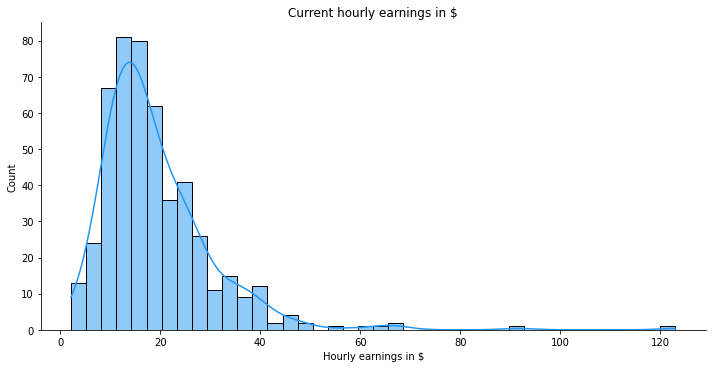

In [ ]:
sns.displot(data=clean_df,
            x="EARNINGS",
            kind="hist",
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title("Current hourly earnings in $")
plt.xlabel("Hourly earnings in $")

plt.show()

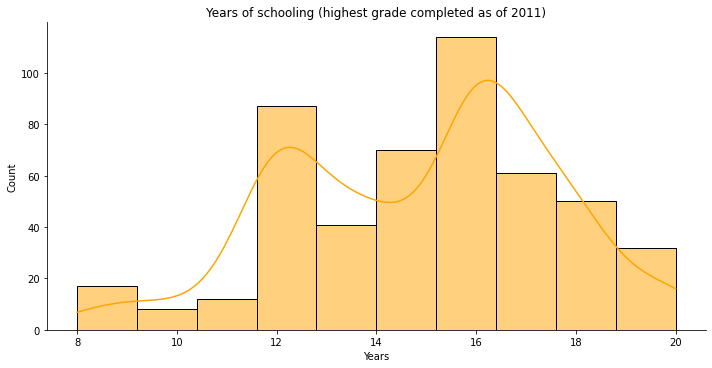

In [ ]:
sns.displot(data=clean_df,
            x="S",
            kind="hist",
            aspect=2,
            kde=True,
            color='orange')

plt.title("Years of schooling (highest grade completed as of 2011)")
plt.xlabel("Years")

plt.show()

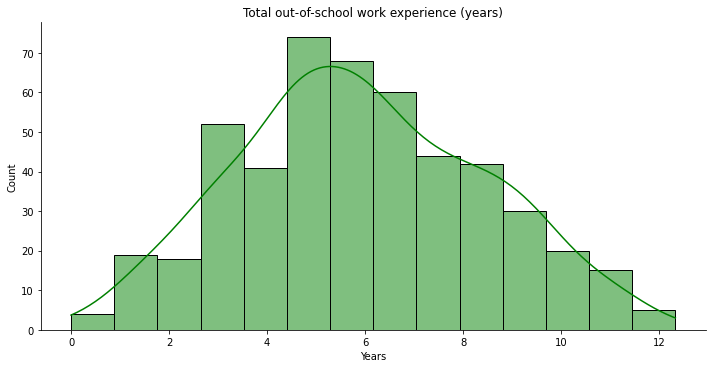

In [ ]:
sns.displot(data=clean_df,
            x="EXP",
            kind="hist",
            aspect=2,
            kde=True,
            color='green')

plt.title("Total out-of-school work experience (years)")
plt.xlabel("Years")

plt.show()

# Understand the relationships in the data

Effects of sex and education on earnings

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

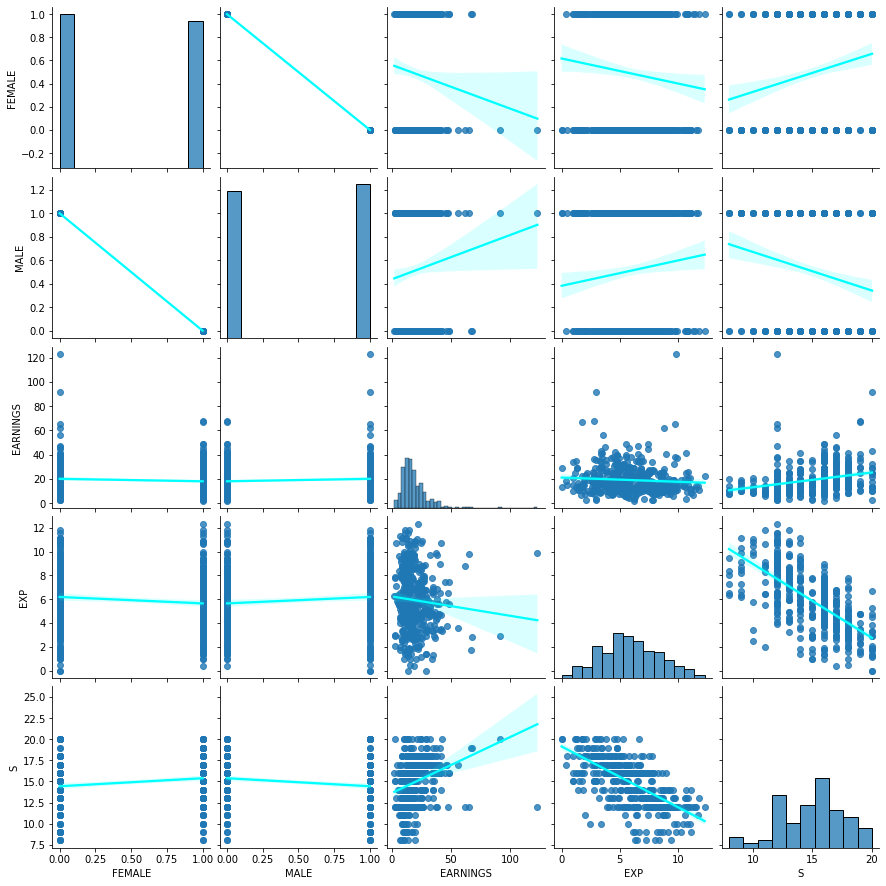

In [ ]:
sns.pairplot(clean_df, 
             vars=["FEMALE", "MALE", "EARNINGS", "EXP", "S"],
             kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})

plt.show()

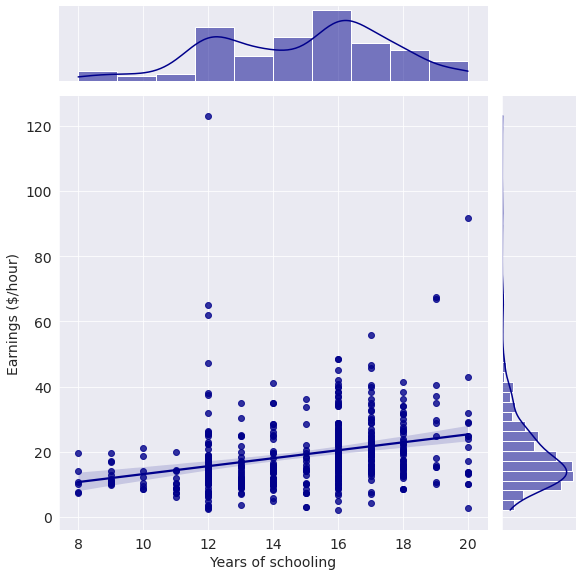

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=clean_df['S'], 
                y=clean_df['EARNINGS'], 
                height=8, 
                kind='reg',
                color="darkblue")

plt.xticks(size = 14)   
plt.yticks(size = 14)   
plt.xlabel("Years of schooling", size = 14)
plt.ylabel("Earnings ($/hour)", size = 14)

plt.show()

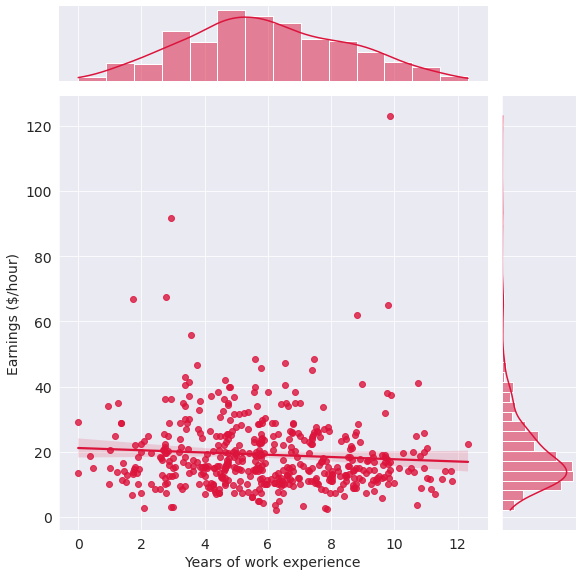

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=clean_df['EXP'], 
                y=clean_df['EARNINGS'], 
                height=8, 
                kind='reg',
                color="crimson")

plt.xticks(size = 14)   
plt.yticks(size = 14)   
plt.xlabel("Years of work experience", size = 14)
plt.ylabel("Earnings ($/hour)", size = 14)

plt.show()

Effects of education style on earnings

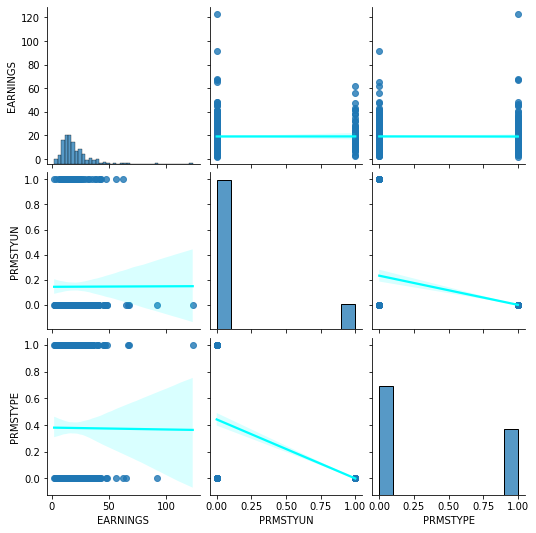

In [ ]:
sns.pairplot(clean_df, 
             vars=["EARNINGS", "PRMSTYUN", "PRMSTYPE"],
             kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})

plt.show()

BMI and BMI-change from 2004 to 2011 correlation with earnings

In [ ]:
# Transform units from pounds to kg, and from inches to meters
clean_df = df_data.dropna()
clean_df = clean_df.drop_duplicates()
clean_df["HEIGHT"] = (clean_df["HEIGHT"] * 2.54)/100
clean_df["WEIGHT04"] = clean_df["WEIGHT04"] * 0.453592
clean_df["WEIGHT11"] = clean_df["WEIGHT11"] * 0.453592

In [ ]:
clean_df["BMI04"] = clean_df["WEIGHT04"] / (clean_df["HEIGHT"]**2)
clean_df["BMI11"] = clean_df["WEIGHT11"] / (clean_df["HEIGHT"]**2)
clean_df["BMIchange"] = clean_df["BMI11"] - clean_df["BMI04"]

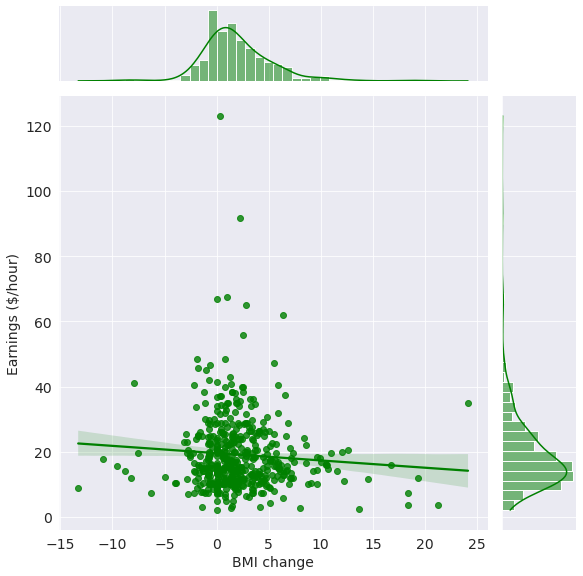

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=clean_df['BMIchange'], 
                y=clean_df['EARNINGS'], 
                height=8, 
                kind='reg',
                color="green")

plt.xticks(size = 14)   
plt.yticks(size = 14)   
plt.xlabel("BMI change", size = 14)
plt.ylabel("Earnings ($/hour)", size = 14)

plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
# Explanatory Variable(s) or Feature(s)
X = clean_df.drop("EARNINGS", axis=1)

# Response Variable or Target (using DataFrame method to avoid)
y = clean_df["EARNINGS"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    train_size = 0.8, 
                                                    random_state = 10)

In [ ]:
# Percentage of training set
train_pct = 100*len(X_train)/len(X)
print(f'Training data is {train_pct:.3}% of the total data.')

# Percentage of test set
test_pct = len(X_test)*100/len(X)
print(f'Test data is {test_pct:.3}% of the total data.')

Training data is 79.9% of the total data.
Test data is 20.1% of the total data.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [ ]:
simp_regr = LinearRegression()
# Create a df for containing just the S "years of schooling" column
Xs_train_df = pd.DataFrame(X_train, columns=["S"])
simp_regr.fit(Xs_train_df, y_train)

# R-squared
rsquared = simp_regr.score(Xs_train_df, y_train)
print(f"The R-squared value is : {rsquared:.2}")


The R-squared value is : 0.066


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [ ]:
# Theta one
print(simp_regr.coef_)

[1.1280176]


In [ ]:
print(f"One could expect to win an extra {round(simp_regr.coef_[0], 2)}$/hour for every additional year of schooling")

One could expect to win an extra 1.13$/hour for every additional year of schooling


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [ ]:
predicted_values_1 = simp_regr.predict(Xs_train_df)
residuals_1 = (y_train - predicted_values_1)

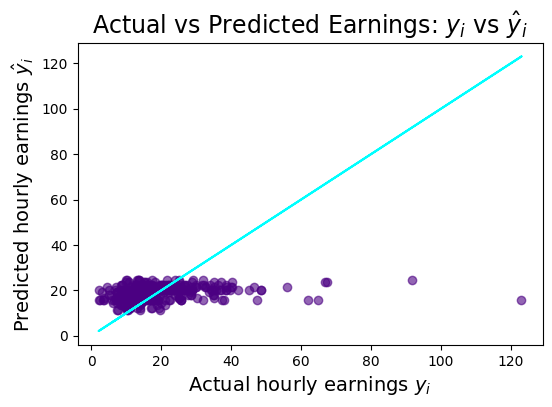

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values_1, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual hourly earnings $y _i$', fontsize=14)
plt.ylabel('Predicted hourly earnings $\hat y _i$', fontsize=14)
plt.show()


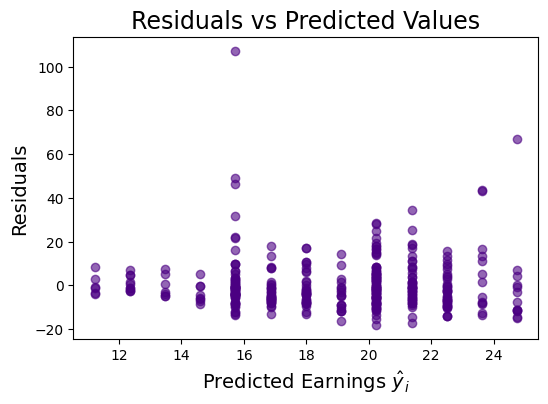

In [ ]:

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values_1, y=residuals_1, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [ ]:
double_regr = LinearRegression()
# Create a df for containing both the S "years of schooling" and EXP "work experience" column
Xs_exp_train_df = pd.DataFrame(X_train, columns=["S", "EXP"])
double_regr.fit(Xs_exp_train_df, y_train)

# R-squared
rsquared = double_regr.score(Xs_exp_train_df, y_train)
print(f"The R-squared value is : {rsquared:.2}")

The R-squared value is : 0.085


### Evaluate the Coefficients of the Model

In [ ]:
double_regr.coef_

array([1.66850097, 0.90050307])

### Analyse the Estimated Values & Regression Residuals

In [ ]:
predicted_values_2 = double_regr.predict(Xs_exp_train_df)
residuals_2 = (y_train - predicted_values_2)

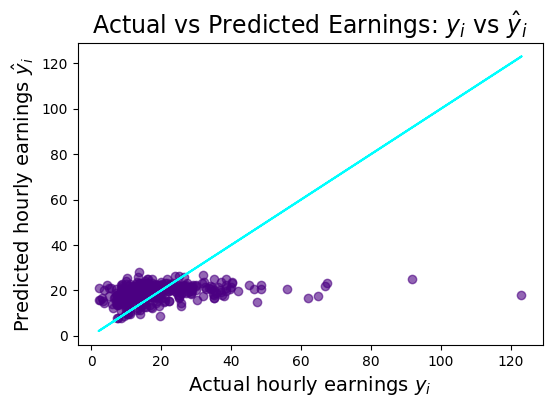

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values_2, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual hourly earnings $y _i$', fontsize=14)
plt.ylabel('Predicted hourly earnings $\hat y _i$', fontsize=14)
plt.show()

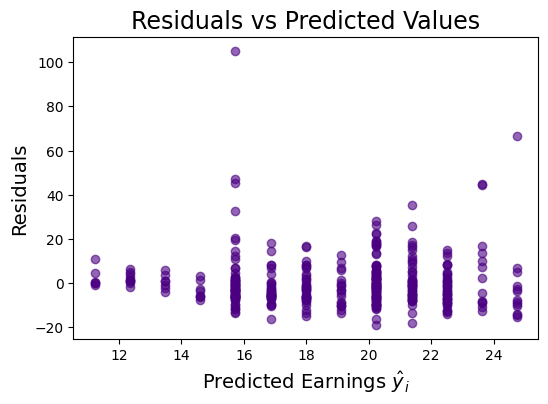

In [ ]:
# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values_1, y=residuals_2, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

Analyze the mean and the skewness of the residuals

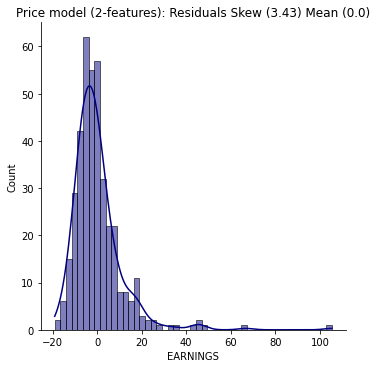

In [ ]:
sns.displot(residuals_2, kde=True, color='navy')
plt.title(f'Price model (2-features): Residuals Skew ({round(residuals_2.skew(), 2)}) Mean ({round(residuals_2.mean(), 2)})')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
years_of_schooling = 16
work_experience = 5

In [ ]:
# Starting Point: Average Values in the Dataset
features = pd.DataFrame(clean_df, columns=["S", "EXP"])
average_vals = features.mean().values
experience_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)

experience_stats

,S,EXP
0,14.89,5.92


In [ ]:
# Make prediction with the average values in the dataset
estimate = double_regr.predict(experience_stats)[0]
print(f'The hourly salary estimate is ${estimate:.3}')

The hourly salary estimate is $19.1


In [ ]:
# Make prediction with proposed values (16,5 years)
experience_stats["S"] = years_of_schooling
experience_stats["EXP"] = work_experience

estimate = double_regr.predict(experience_stats)[0]
print(f'The hourly salary estimate is ${estimate:.3}')


The hourly salary estimate is $20.1


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [ ]:
# Try a regression including all features
all_regr = LinearRegression()
all_regr.fit(X_train, y_train)

# R-squared
rsquared = all_regr.score(X_train, y_train)
print(f"The R-squared value (for the train set) is : {rsquared:.2}")
rsquared_t = all_regr.score(X_test, y_test)
print(f"The R-squared value (for the train set) is : {rsquared_t:.2}")

The R-squared value (for the train set) is : 0.41
The R-squared value (for the train set) is : -0.18


In [ ]:
# Try a Random Forest regressor
random_model = RandomForestRegressor(n_estimators=100)
random_model.fit(X_train,y_train)
random_score = random_model.score(X_train,y_train)
random_score_t = random_model.score(X_test,y_test)
print(f"The score is (for the train set) : {random_score:.2}")
print(f"The score is (on the test set) : {random_score_t:.2}")

The score is (for the train set) : 0.86
The score is (on the test set) : 0.23


In [ ]:
predicted_values_3 = all_regr.predict(X_train)
residuals_3 = (y_train - predicted_values_3)

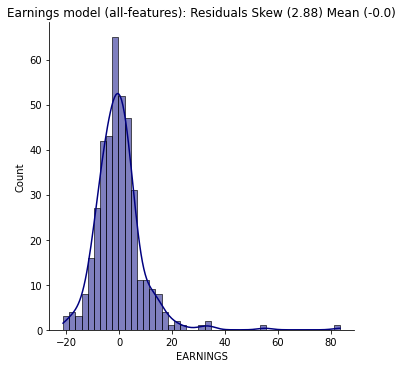

In [ ]:
sns.displot(residuals_3, kde=True, color='navy')
plt.title(f'Earnings model (all-features): Residuals Skew ({round(residuals_3.skew(), 2)}) Mean ({round(residuals_3.mean(), 2)})')
plt.show()

In [ ]:
df_coef = pd.DataFrame(data=abs(all_regr.coef_), index=X_train.columns, columns=["coef"])
df_coef.sort_values("coef", ascending=False, inplace=True)
df_coef.head(50)

,coef
VERBAL,"6,221,061.17"
ASVABPC,"3,534,183.51"
ASVABWK,"3,534,179.20"
ASVABC4,"1,805,348.75"
ASVABC,"1,050,123.19"
ASVABMK,"505,193.14"
ASVABAR,"71,925.28"
AGE,16.55
HEIGHT,15.69
BYEAR,15.18


In [ ]:
fine_regr = LinearRegression()
# Create a df for containing both the S "years of schooling" and EXP "work experience" column
Xfine_train_df = pd.DataFrame(X_train, columns=["ASVABPC", "ASVABWK", "ASVABC4", "ASVABC", "ASVABMK", "ASVABAR", "FEMALE", "MALE", "AGE", "BYEAR"])
fine_regr.fit(Xfine_train_df, y_train)

# R-squared
rsquared = fine_regr.score(Xfine_train_df, y_train)
print(f"The R-squared value is : {rsquared:.2}")

The R-squared value is : 0.12


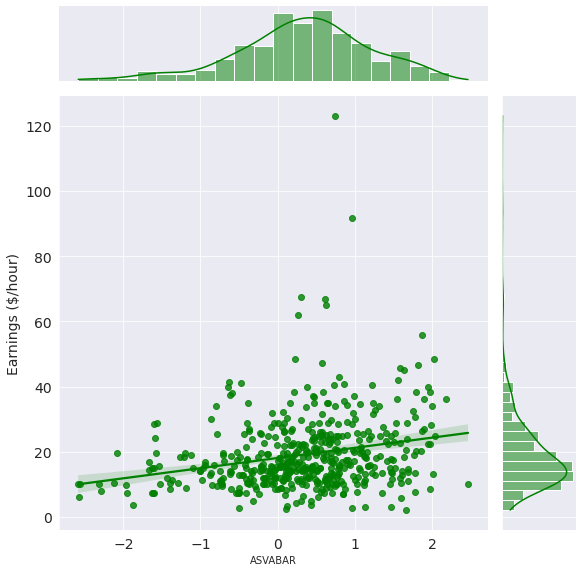

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=clean_df['ASVABAR'], 
                y=clean_df['EARNINGS'], 
                height=8, 
                kind='reg',
                color="green")

plt.xticks(size = 14)   
plt.yticks(size = 14)   
# plt.xlabel("BMI change", size = 14)
plt.ylabel("Earnings ($/hour)", size = 14)

plt.show()

# Try a log transform of the earnings and see how it affects the model

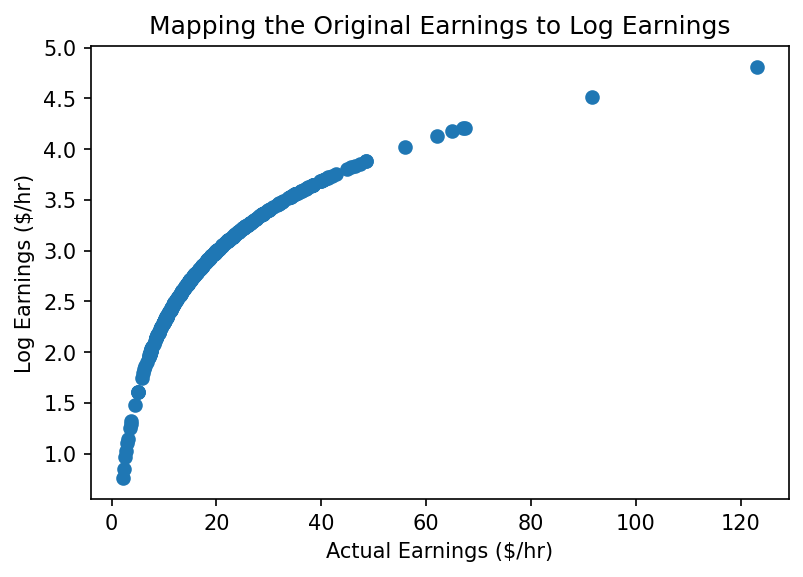

In [ ]:
plt.figure(dpi=150)
plt.scatter(clean_df.EARNINGS, np.log(clean_df.EARNINGS))

plt.title('Mapping the Original Earnings to Log Earnings')
plt.ylabel('Log Earnings ($/hr)')
plt.xlabel('Actual Earnings ($/hr)')
plt.show()

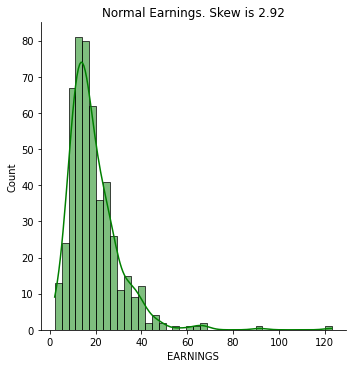

In [ ]:
tgt_skew = clean_df['EARNINGS'].skew()
sns.displot(clean_df['EARNINGS'], kde='kde', color='green')
plt.title(f'Normal Earnings. Skew is {tgt_skew:.3}')
plt.show()

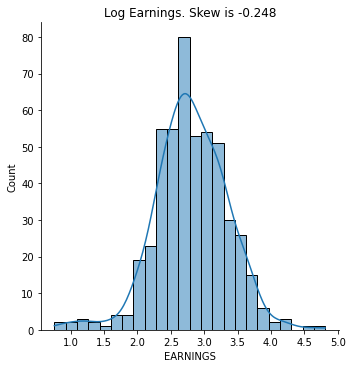

In [ ]:
y_log = np.log(clean_df['EARNINGS'])
sns.displot(y_log, kde=True)
plt.title(f'Log Earnings. Skew is {y_log.skew():.3}')
plt.show()

The log earnings have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals.

In [ ]:
new_target = np.log(clean_df['EARNINGS']) # Use log prices
features = clean_df.drop('EARNINGS', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.48


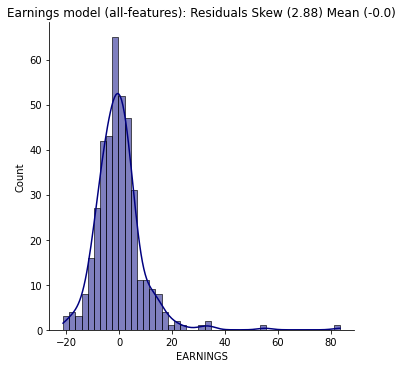

In [ ]:
sns.displot(residuals_3, kde=True, color='navy')
plt.title(f'Earnings model (all-features): Residuals Skew ({round(residuals_3.skew(), 2)}) Mean ({round(residuals_3.mean(), 2)})')
plt.show()

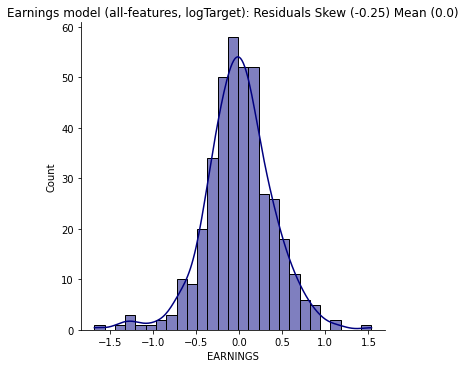

In [ ]:
sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Earnings model (all-features, logTarget): Residuals Skew ({round(log_residuals.skew(), 2)}) Mean ({round(log_residuals.mean(), 2)})')
plt.show()

# Crazy idea of create all possible combinations of features and evaluate their R-score and residual mean and skewness. 

Then add it to a Dataframe and sort by best (highest R-score and lowest residual mean and skewness-

In [ ]:
import itertools

# Get the column identifiers
features = clean_df.columns
# Transform the index object into a list
features = features.tolist()
# Remove the first two elements (ID and the target EARNINGS) 
features = features[2:]
print(features)


['S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE', 'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF', 'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC', 'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO', 'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE', 'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED', 'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO', 'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO', 'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT', 'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE', 'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN', 'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS', 'CATSE', 'COLLBARG', 'URBAN', 'REGNE', 'REGNC', 'REGW', 'REGS', 'MSA11NO', 'MSA11NCC', 'MSA11CC', 'MSA11NK', 'MSA11NIC']


In [ ]:
# Generate all possible combinations of the elements in the given list:
# In this case it is nuts (There are a total of 79,228,162,514,264,337,593,543,950,335 different combinations)
combinations = []
for i in range(1, len(features)+1):
    for subset in itertools.combinations(features, i):
        combinations.append(list(subset))

print(len(combinations))